In [53]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import os

In [16]:
df = pd.read_csv("ETH_1H.csv")
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [17]:
df.nunique()

Unix Timestamp    34497
Date              34497
Symbol                1
Open              20189
High              19276
Low               19259
Close             20189
Volume            31404
dtype: int64

In [58]:
df_1 = df.drop(columns=["Symbol","Unix Timestamp"])
df_1.head()

,Date,Open,High,Low,Close,Volume
0,2020-04-16 00:00:00,152.94,152.94,150.39,150.39,650.188125
1,2020-04-15 23:00:00,155.81,155.81,151.39,152.94,4277.567299
2,2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279
3,2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131
4,2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622


In [64]:
df_2 = df_1.copy()
df_2["Date"] = pd.to_datetime(df_2["Date"]).dt.date
grps_mean = df_2.groupby(by="Date").mean()[["Open","Close","Volume"]].reset_index()
grps_max = df_2.groupby(by="Date").max()[["High"]].reset_index()
grps_min = df_2.groupby(by="Date").min()[["Low"]].reset_index()

grps_min_max = pd.merge(left=grps_min,right=grps_max,how="inner",on="Date")
grps = pd.merge(left=grps_min_max,right=grps_mean,how="inner",on="Date")

df_3 = grps.set_index("Date")
df_3 = df_3.round(2)
df_3.reset_index(inplace=True)
df_3.head()

,Date,Low,High,Open,Close,Volume
0,2016-05-09,0.00,12.00,8.86,9.71,122.08
1,2016-05-10,9.36,9.96,9.58,9.59,26.96
2,2016-05-11,9.68,10.47,9.90,9.93,127.19
3,2016-05-12,9.92,12.00,10.51,10.50,86.36
4,2016-05-13,10.20,11.59,10.70,10.73,76.56


In [65]:
cols = df_3.columns.values[1:]
cols

array(['Low', 'High', 'Open', 'Close', 'Volume'], dtype=object)

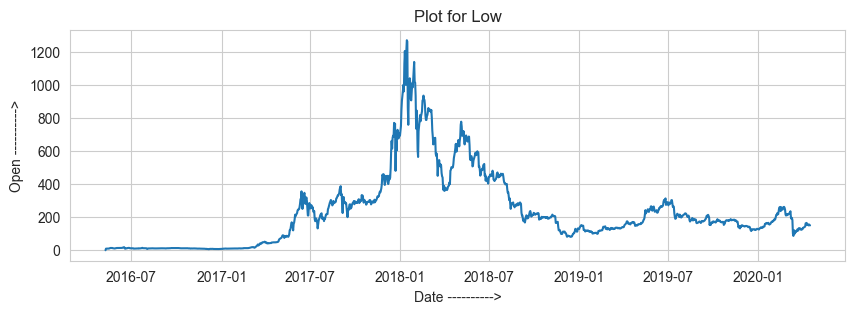

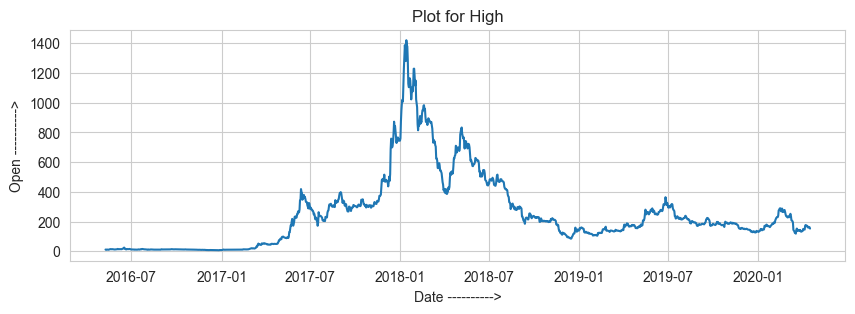

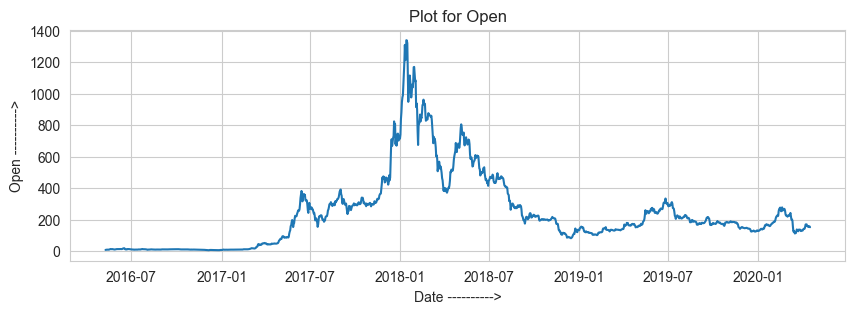

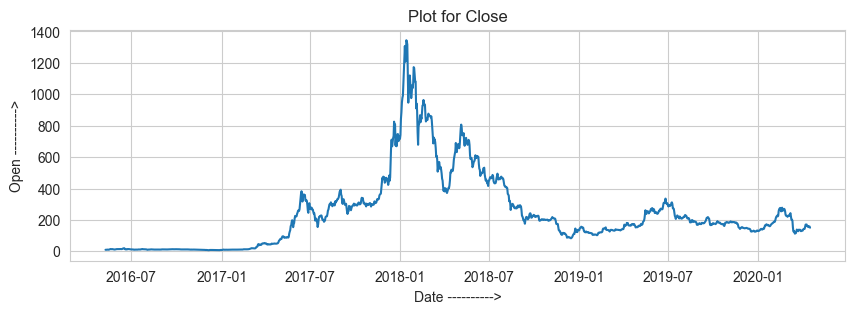

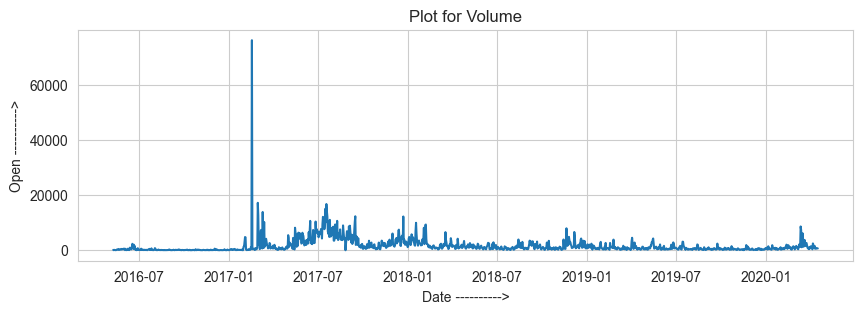

In [67]:
for i in cols:
    plt.subplots(figsize=(10,3))
    sns.lineplot(x=df_3["Date"],y=df_3[i])
    plt.title("Plot for "+i)
    plt.xlabel("Date ---------->")
    plt.ylabel("Open ---------->")
    plt.show()

<Axes: >

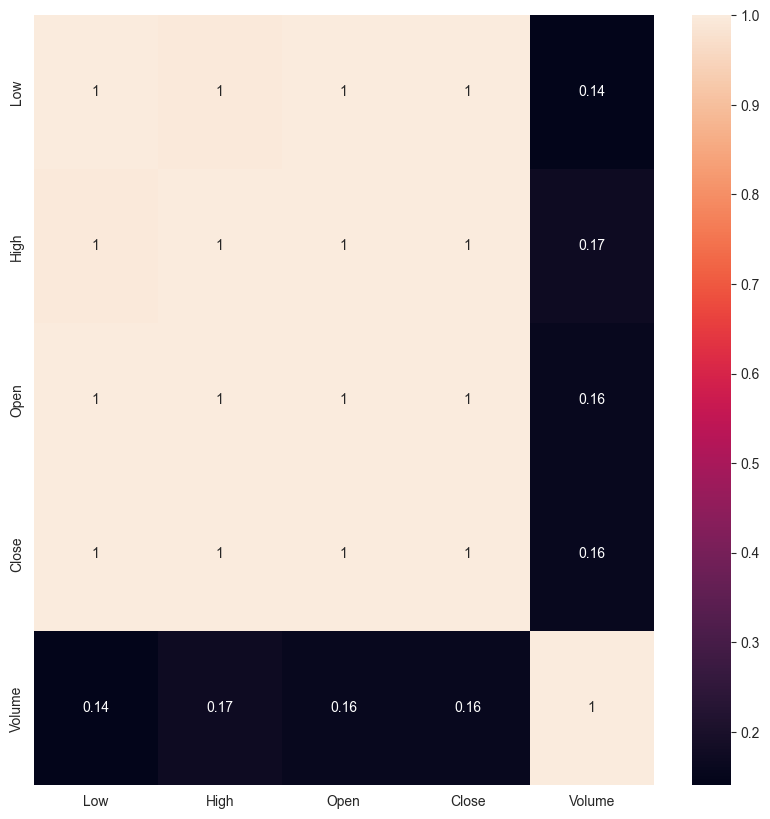

In [68]:
plt.subplots(figsize=(10,10))
df_4 = df_3.set_index("Date")
sns.heatmap(df_4.corr(),annot=True)

In [70]:
df_5 = df_4.drop(columns=["High","Low","Open","Volume"])
df_5.head()

,Close
Date,
2016-05-09,9.71
2016-05-10,9.59
2016-05-11,9.93
2016-05-12,10.50
2016-05-13,10.73
